In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Full rates

In [59]:
EXPERIMENT = 'oracle_rates'

df = pd.read_csv(f'./results/{EXPERIMENT}_results_paper.csv', sep=', ', engine='python')

df = df.rename(
    {
        'sample_size': '# Samples',
        'Number of environments': '# Environments',
        'sparsity': 'Shift fraction',
        'dag_density': 'Density',
        'n_variables': 'Vars',
        'Method': 'Test',
    }, axis=1
).replace(
    {
        'Full PC (oracle)': 'Pooled PC (oracle) [25]',
        'Min changes (oracle)': 'MSS (oracle)',
    }
)

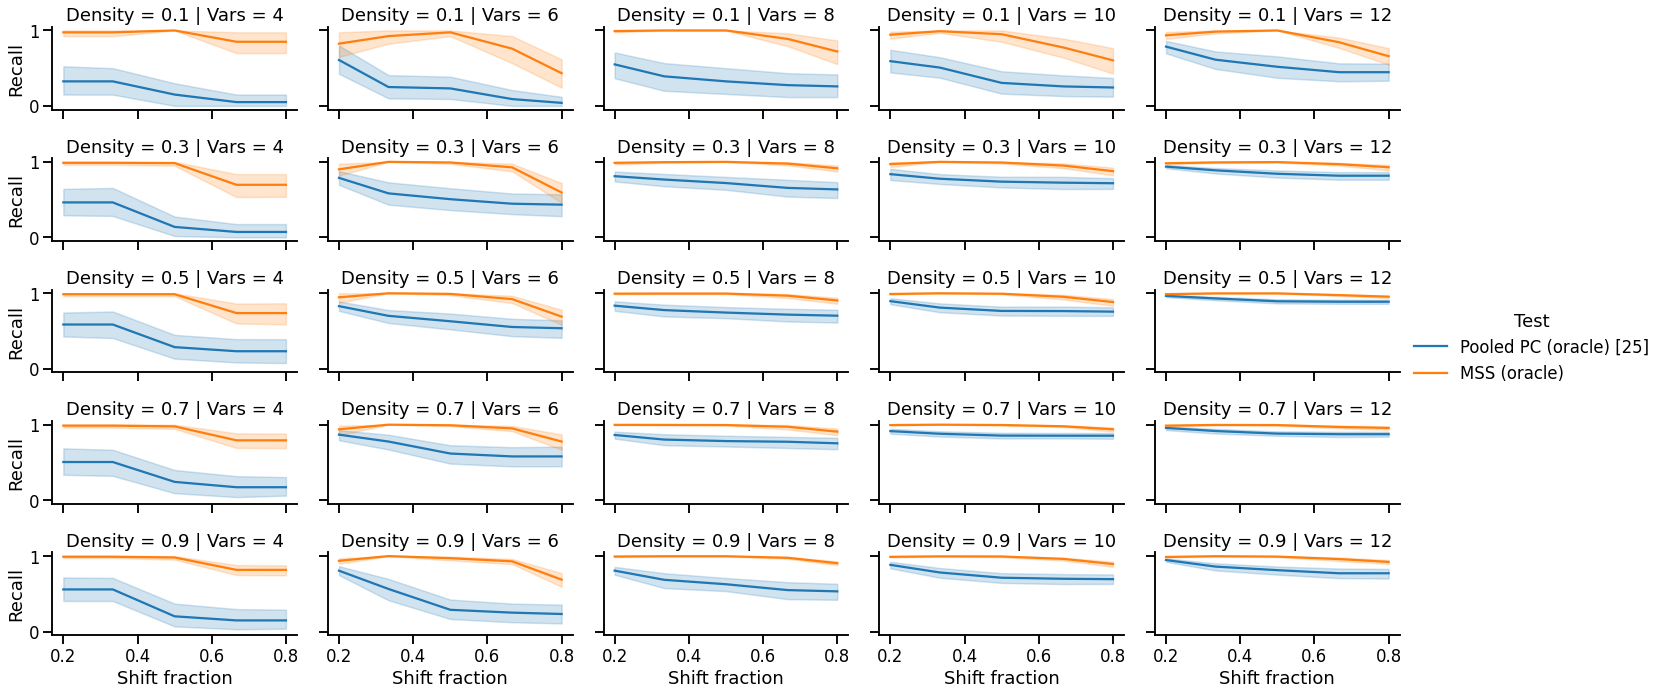

In [77]:
sns.set_context('talk')

for n_env in [5]:
    g = sns.relplot(
        data=df[
            (df['# Environments'] == n_env)
            # & (df['# vars'].isin([6, 12]))
        ],
        x='Shift fraction',
        y='Recall',
        hue='Test',
        row='Density',
        col='Vars',
        # hue_order=['MSS (oracle)', 'Pooled PC (oracle) [25]'],
        # ci=None,
        # style='Metric',
        kind='line',
        height=2,
        aspect=2,
        legend='full',
        # facet_kws={'sharey': False, 'sharex': True},
    )

# g._legend.set_bbox_to_anchor([0.85,0.18])
# g._leg.legend(bbox_to_anchor=(1, 0), loc=2, borderaxespad=0.)
# for ax in np.concatenate(g.axes)[:-1]:
#     ax.get_legend().remove()

plt.savefig('./figures/oracle_rate_relplot.pdf')

## Marginal rates

In [5]:
EXPERIMENT = 'oracle_select_rates'

df = pd.read_csv(f'./results/{EXPERIMENT}_results_paper.csv', sep=', ', engine='python')

df['Fraction of shifting mechanisms'] = df['sparsity'] / df['n_variables']

df = df.rename(
        {
            'sample_size': '# Samples',
            'Number of environments': '# Environments',
            'Fraction of shifting mechanisms': 'Shift fraction',
            'dag_density': 'Edge density',
            'n_variables': '# Variables',
        }, axis=1
    ).replace(
        {
            'Full PC (oracle)': 'Pooled PC (oracle) [25]',
            'Min changes (oracle)': 'MSS (oracle)',
        }
    )

In [6]:
df.head(10)

,params_index,# Variables,n_total_environments,sparsity,intervention_targets,# Samples,Edge density,reps,data_simulator,dag_simulator,...,Number of possible DAGs,MEC size,MEC total edges,MEC unoriented edges,True orientation rate,False orientation rate,Precision,Recall,Average precision,Shift fraction
0,0,6,5,0.5,None,None,0.3,20,None,er,...,3,3,2,2,0.0,0.0,1.0,0.0,0.0,0.083333
1,0,6,5,0.5,None,None,0.3,20,None,er,...,3,3,2,2,0.0,0.0,1.0,0.0,0.0,0.083333
2,0,6,5,0.5,None,None,0.3,20,None,er,...,2,3,2,2,0.5,0.0,1.0,0.5,0.5,0.083333
3,0,6,5,0.5,None,None,0.3,20,None,er,...,2,3,2,2,0.5,0.0,1.0,0.5,0.5,0.083333
4,0,6,5,0.5,None,None,0.3,20,None,er,...,2,3,2,2,0.5,0.0,1.0,0.5,0.5,0.083333
5,0,6,5,0.5,None,None,0.3,20,None,er,...,1,3,2,2,1.0,0.0,1.0,1.0,1.0,0.083333
6,0,6,5,0.5,None,None,0.3,20,None,er,...,2,3,2,2,0.5,0.0,1.0,0.5,0.5,0.083333
7,0,6,5,0.5,None,None,0.3,20,None,er,...,1,3,2,2,1.0,0.0,1.0,1.0,1.0,0.083333
8,0,6,5,0.5,None,None,0.3,20,None,er,...,2,3,2,2,0.5,0.0,1.0,0.5,0.5,0.083333
9,0,6,5,0.5,None,None,0.3,20,None,er,...,1,3,2,2,1.0,0.0,1.0,1.0,1.0,0.083333


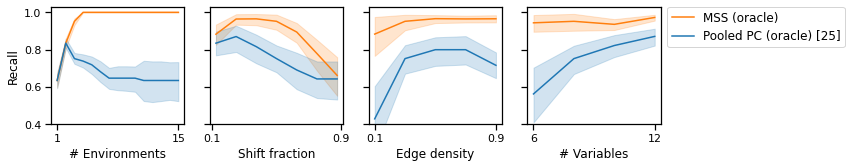

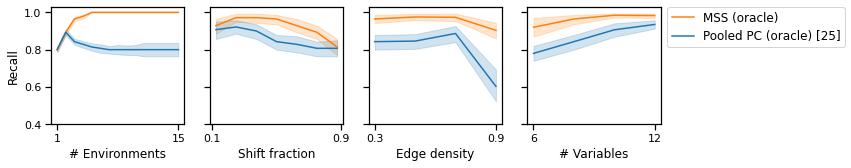

In [4]:
sns.set_context('notebook')

plot_df = df

grid_vars = [
    '# Environments', 'Shift fraction', 'Edge density', '# Variables'
]

# indices = [
#     (16, 30), (8, 16), (30, 40), (0, 8),  
# ]
indices = [
    (22, 36), (8, 22), (36, 46), (0, 8),
]

for graph_model in plot_df['dag_simulator'].unique():
    fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12, 2.5))

    for g_var, (lb, ub), ax in zip(grid_vars, indices, axes.flatten()):
        plot_df_ax = plot_df[
            (plot_df['params_index'] >= lb)
            & (plot_df['params_index'] < ub)
            & (plot_df['dag_simulator'] == graph_model)
            # IMPORTANT! otherwise average over all number of environments
            & (
                (plot_df['# Environments'] == 3)
                if not (g_var == '# Environments') else True)
        ]
        
        sns.lineplot(
            data=plot_df_ax,
            # data=plot_df.groupby([g_var, 'Test']).mean().reset_index(),
            x=g_var,
            y='Recall',
            hue='Method',
            # style="Test",
            ax=ax,
            hue_order=['MSS (oracle)', 'Pooled PC (oracle) [25]'],
            palette=[
                sns.color_palette("tab10")[i]
                for i in [1, 0] # 3, 4, 5, 
            ],
            # markers=['d', 'P', 's'],
            # palette='Set1',
            legend='full',
            # alpha=1,
        )

        # ax.axvline(0.05, ls=':', c='grey')
        # ax.set_title('')
        # ax.legend(loc='upper right')
        
        ax.set_xticks([
            np.round(plot_df_ax[g_var].min(), 1),
            np.round(plot_df_ax[g_var].max(), 1)
        ])

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.setp(axes[-1].get_legend().get_texts(), fontsize=12)
    for ax in axes[:-1]:
        ax.get_legend().remove()
        
    plt.ylim([0.4, 1.03])
    print(graph_model)
    # plt.suptitle(f'DAG model: {graph_model}', fontsize=14, y=0.96, x=0.45)
    plt.tight_layout()
    plt.savefig(f'./figures/oracle_select_rates_{graph_model}.pdf')
    plt.show()

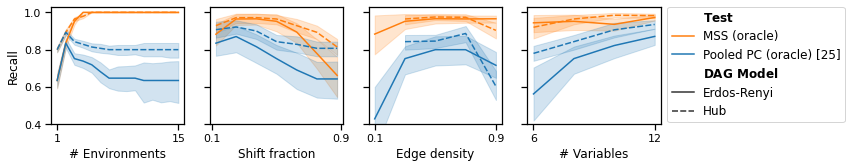

In [17]:
sns.set_context('notebook')

plot_df = df

grid_vars = [
    '# Environments', 'Shift fraction', 'Edge density', '# Variables'
]

# indices = [
#     (16, 30), (8, 16), (30, 40), (0, 8),  
# ]
indices = [
    (22, 36), (8, 22), (36, 46), (0, 8),
]

# for graph_model in plot_df['dag_simulator'].unique():
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12, 2.5))

for g_var, (lb, ub), ax in zip(grid_vars, indices, axes.flatten()):
    plot_df_ax = plot_df[
        (plot_df['params_index'] >= lb)
        & (plot_df['params_index'] < ub)
        # & (plot_df['dag_simulator'] == graph_model)
        # IMPORTANT! otherwise average over all number of environments
        & (
            (plot_df['# Environments'] == 3)
            if not (g_var == '# Environments') else True)
    ]

    sns.lineplot(
        data=plot_df_ax.replace(
                {'er': 'Erdos-Renyi', 'ba': 'Hub'},
            ).rename(
                {'dag_simulator': r'$\bf{DAG\ Model}$', 'Method': r'$\bf{Test}$'},
                axis=1),
        # data=plot_df.groupby([g_var, 'Test']).mean().reset_index(),
        x=g_var,
        y='Recall',
        hue=r'$\bf{Test}$',
        # style="Test",
        ax=ax,
        hue_order=['MSS (oracle)', 'Pooled PC (oracle) [25]'],
        palette=[
            sns.color_palette("tab10")[i]
            for i in [1, 0] # 3, 4, 5, 
        ],
        style=r'$\bf{DAG\ Model}$',
        # markers=['d', 'P', 's'],
        # palette='Set1',
        legend='full',
        # alpha=1,
    )

    # ax.axvline(0.05, ls=':', c='grey')
    # ax.set_title('')
    # ax.legend(loc='upper right')

    ax.set_xticks([
        np.round(plot_df_ax[g_var].min(), 1),
        np.round(plot_df_ax[g_var].max(), 1)
    ])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(axes[-1].get_legend().get_texts(), fontsize=12)
for ax in axes[:-1]:
    ax.get_legend().remove()

plt.ylim([0.4, 1.03])
# plt.suptitle(f'DAG model: {graph_model}', fontsize=14, y=0.96, x=0.45)
plt.tight_layout()
plt.savefig(f'./figures/oracle_select_rates_all_models.pdf')
plt.show()